#Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from ggplot import *
matplotlib.style.use('ggplot')  
%matplotlib inline
data = pd.ExcelFile("Data Dictionary.xlsx")
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#Problem statement

In [ ]:
# At priceline we use data to solve today’s most challenging ecommerce problems and to uncover growth opportunities.
# This basic challenge will give you a feel for the size and type of data we have at our disposal. At this stage, we are more interested in 
# understanding how you think and communicate ideas rather than testing your technical capabilities.
 
# Using the data and resources provided in Dropbox, tell us which customers we should target with a 10% coupon in 
# order to increase conversion. Conversion is the percentage of searches that result in a booking. 
 
# The data contains two weeks of hotel searches and bookings leading up to a Valentine’s Day (02/14/15) check-in date.
# You may use whichever tools you feel most comfortable with (Excel, R, Tableau, python, etc.) to manipulate and analyze
# data.

# Again, this is meant to be high-level so do not attempt to match individual searches to bookings. Instead, we suggest 
# you focus on customer segments.


# Spend no more than an hour analyzing data and drafting your recommendation(s) in a final deliverable. Come prepared
# to briefly walk the team through your deliverable during the interview. Electronic copy is preferred (flash drive or
# cloud stored). Be sure to document your approach,key assumptions, supporting analysis and final recommendation(s). 
 
# Datasets & Resources: Dropbox
# Password: Winterfell
 
# 1.  Search Data: text file of hotel searches on our website for a 02/14/2015 check-in date (semi-colon separated)
# 2.  Booking Data: text file of hotel bookings made on our website with a 02/14/2015 check-in date (semi-colon 
# separated)
# 3.  Data Dictionary: example rows of search and booking data along with a legend explaining the columns of 
# each data set
# 4.  Search Guide: visual guide to how the data is presented/collected on our site--seen--cookie depends on whether 
# someone is logged in
 
# Good Luck!!!

#Objective

In [ ]:
To maximize over all conversion rate we should target segments which are most likely to make a booking.

#Approach

I divide the data in to segments and target the segments with the highest potential for conversion. The segments with the highest potential for conversion are the ones where the percentage of searches is larger than percentage bookings.


Segmented the search data with respect to cookie value/user id, city of search, length of stay, advanced purchase window and calculated the contribution of each segment.

Segmented the booking data with respect to city of search, length of stay, advanced purchase window and calculated the contribution of each segment.

The point is to identify target segments based these results.



# Key Assumptions

1. Each visitor is only relying on priceline to plan their holiday.
2. Searches more than 5 in 2 weeks are deemed unusually high.
2. Each visitor logs in before they search for deals on the website or they are an old customer.
3. Visitors who make a large number of searches could possibly motivated to make a booking by providing the coupon as 
   an incentive. 
4. This approach does not consider the bias in the search Data due couples who want to celebrate Valentine's day.


#Supporting analysis

In [2]:
df_sample_search_0=pd.io.excel.ExcelFile.parse(data,header=1,sheetname=0)
df_sample_search_1=pd.io.excel.ExcelFile.parse(data,header=1,sheetname=1)
df_sample_search_2=pd.io.excel.ExcelFile.parse(data,header=1,sheetname=2)
df_sample_search_3=pd.io.excel.ExcelFile.parse(data,header=1,sheetname=3)
df_sample_search_0=df_sample_search_0.iloc[0:,1:]
df_sample_search_1=df_sample_search_1.iloc[0:,1:]
df_sample_search_2=df_sample_search_2.iloc[0:,1:]
df_sample_search_3=df_sample_search_3.iloc[0:,1:]

In [106]:
df_sample_search_0

VISIT_ID  USER_SEARCH_ID  \
0    v20141214211220f7e02162     47431438507   
1    v20141214211220f7e02162     47431447347   
2    v201412080334275cb02031     47432848097   
3    v20140623171113e0802161     47433005127   
4    v20140623171113e0802161     47433362147   
5    v20140918050651e4102022     47412612367   
6    v2014122001063435a02030     47417852587   
7    v20141227204520a3d02029     47434228567   
8    v20140501230604eea02163     47426710647   
9    v20140501230604eea02163     47411913117   
10   v2014081004384818ed2021     47422456817   
11   v2014081110351851402165     47433534637   
12   v2014112314531941eac018     47424962207   
13   v2014112314531941eac018     47424619377   
14   v20150102192839a9f02162     47414528707   
15   v20150102192839a9f02162     47414517967   
16   v20150102192839a9f02162     47414473627   
17   v20150102192839a9f02162     47414472477   
18   v20150102192839a9f02162     47412304107   
19   v20150102192839a9f02162     47414339277   
20   v2013022801444505bf0015     47414412387   
21   v2013022801444505bf0015     47414448977   
22   v2013022801444505bf0015     47414423007   
23   v20141121155250fb502164     47421434007   
24   v2014122801325614f7e030     47425010137   
25   v20140904202250ace02023     47428532517   
26   v20141215024331598cc023     47424359977   
27   v20141215024331598cc023     47424138577   
28   v20141228151325d0f02021     47415614997   
29   v2014081110351851402165     47433528887   
30   v2014110301403710c02162     47415934397   
31   v2015011602551278489031     47430042077   
32   v2015011602551278489031     47430435557   
33   v2015010723204367a44013     47414852277   
34   v20150108031952b7402029     47434348307   
35   v20150108031952b7402029     47431643217   
36   v20150108031952b7402029     47432083827   
37   v20150112014651c1801159     47420715527   
38   v2014123104332588ae5014     47433483137   
39   v2015010304535705a02160     47411509087   
40   v2015010304535705a02160     47411522507   
41   v2015010304535705a02160     47411521887   
42   v20150111044848bef02029     47413254277   
43   v20150109182427b8502023     47431322417   
44   v20150113232048c9b02022     47432613247   
45   v20150113232048c9b02022     47432445517   
46   v20150113232048c9b02022     47425857677   
47   v20150113232048c9b02022     47433060487   
48   v2015010923462782cd3018     47417853107   
49   v2015011502472605c02157     47427886947   
50   v2015011503375894079023     47413440957   
51   v2015011401362781418029     47417821767   
52   v20150110004442c1602030     47434458917   
53   v2015011601065355f02030     47412020387   
54   v2015011601065355f02030     47413844877   
55   v2015011601065355f02030     47413857247   
56   v2015011601065355f02030     47413861117   
57   v2015011601065355f02030     47412198547   
58   v2015011601065355f02030     47414178227   
59   v2015011601065355f02030     47413768107   
60   v2015011601065355f02030     47413853017   
61   v20150107205039c6802159     47429348897   
62   v20150107205039c6802159     47429372447   
63   v20150107205039c6802159     47413923497   
64   v20150107205039c6802159     47414145027   
65   v2015010502010348068023     47417988677   
66   v2015011317542072de6014     47418983117   
67   v2015011317542072de6014     47419003997   
68   v201501180311546a202023     47416227467   
69   v201501110243577830c018     47428798247   
70   v201412180146119288e015     47432222067   
71   v20141221171850180f2033     47422959327   
72   v20141221171850180f2033     47422512897   
73   v20141221171850180f2033     47423516457   
74   v2015011600041369718012     47427876477   
75   v20150118000836ad702024     47419844767   
76   v20150118000836ad702024     47419824317   
77   v2015011515304048c7e031     47428308987   
78   v201501070137167759a023     47432837927   
79   v2015010323531450cbc011     47422583127   
80   v2015010323531450cbc011     47422536747   
81   v2015010500581744590018     47418199887   
82   v2015010500581744590018     474

In [5]:
df_sample_search_1

Column               Column Name  \
0        1                  VISIT_ID   
1        2            USER_SEARCH_ID   
2        3              COOKIE_VALUE   
3        4    SRCH_TRAVEL_START_DATE   
4        5      SRCH_TRAVEL_END_DATE   
5        6                  SRCH_LOS   
6        7                   SRCH_AP   
7        8     SRCH_DATE_TIME_ORIGIN   
8        9          SRCH_DATE_ORIGIN   
9       10          SRCH_HOUR_ORIGIN   
10      11       SRCH_WEEKDAY_ORIGIN   
11      12            ORIGIN_CITY_ID   
12      13               ORIGIN_CITY   
13      14      ORIGIN_PROVINCE_CODE   
14      15           ORIGIN_PROVINCE   
15      16       ORIGIN_COUNTRY_CODE   
16      17            ORIGIN_COUNTRY   
17      18           ORIGIN_LATITUDE   
18      19          ORIGIN_LONGITUDE   
19      20                 SRCH_DEST   
20      21                 SRCH_TYPE   
21      22       SRCH_DATE_TIME_DEST   
22      23            SRCH_DATE_DEST   
23      24            SRCH_HOUR_DEST   
24      25         SRCH_WEEKDAY_DEST   
25      26              DEST_CITY_ID   
26      27                 DEST_CITY   
27      28             DEST_PROVINCE   
28      29        DEST_PROVINCE_CODE   
29      30         DEST_COUNTRY_CODE   
30      31              DEST_COUNTRY   
31      32             DEST_LATITUDE   
32      33            DEST_LONGITUDE   
33      34  DIST_SRCH_ORIGIN_TO_DEST   

                                   Column Description  
0      Unique identifier for each visit a shopper has  
1   Unique Searches - identifier for each search a...  
2   Searchers - CUSTOMER_ID when customer has prev...  
3   Check in date. Null  when none is selected at ...  
4   Check out date. Null  when none is selected at...  
5   Searched length of stay (check out date minus ...  
6   Advance purchase window (check in date minus s...  
7   Date and time the search occured based on the ...  
8   Date the search occured based on the shopper's...  
9   Hour of day the search occured based on the sh...  
10  Day of week the search occurred based on shopp...  
11  Unique identifier for the shopper's location -...  
12                        Origin city (San Francisco)  
13         State/province of origin city (California)  
14                    Origin state/province code (CA)  
15                           Origin country code (US)  
16                     Origin country (UNITED STATES)  
17                     Latitude of the ORIGIN_CITY_ID  
18                    Longitude of the ORIGIN_CITY_ID  
19  Destination term used in the search. Correspon...  
20  Type of term search - city, zipcode, country, ...  
21  Date and time the search occured based on the ...  
22  Date the search occured based on the searched ...  
23  Hour of day the search occured based on the se...  
24  Day of week the search occurred based on searc...  
25  Unique city identifier (San Francisco, CA, Uni...  
26          Destination city searched (San Francisco)  
27  Destination state/province of searched city (C...  
28               Destination state/province code (CA)  
29                      Destination country code (US)  
30                Destination country (UNITED STATES)  
31                       Latitude of the DEST_CITY_ID  
32                      Longitude of the DEST_CITY_ID  
33  Distance of the shopper's origin city to the s...

In [6]:
df_sample_search_2

TRANSACTION_ID PRODUCT_DESC  CUSTOMER_EMAIL_KEY     OFFER_DATE_TIME  \
0       10520797814        HOTEL            31060306 2015-02-13 21:01:20   
1       10501047514        HOTEL            86675142 2015-02-12 07:46:50   
2       10487802914        HOTEL            77459670 2015-02-10 21:31:06   
3       10471998414        HOTEL            71349237 2015-02-09 10:06:32   
4       10472239314        HOTEL            18655107 2015-02-09 10:43:57   
5       10428546114        HOTEL            86461766 2015-02-03 23:39:02   
6       10428417214        HOTEL            86461766 2015-02-03 23:21:24   
7       10513020614        HOTEL            86703079 2015-02-13 09:57:42   
8       10511848714        HOTEL            86626543 2015-02-13 04:21:12   
9       10502341914        HOTEL            81960463 2015-02-12 11:26:12   
10      10477254614        HOTEL            86577665 2015-02-09 20:03:09   
11      10473009814        HOTEL            58119779 2015-02-09 12:21:05   
12      10520764314        HOTEL            58296718 2015-02-13 20:58:19   
13      10517697714        HOTEL            86693545 2015-02-13 16:44:08   
14      10515298514        HOTEL            52177477 2015-02-13 13:29:52   
15      10514494314        HOTEL            38980991 2015-02-13 12:19:32   
16      10513797214        HOTEL            86705601 2015-02-13 11:16:56   
17      10513781514        HOTEL            44809211 2015-02-13 11:15:28   
18      10513481314        HOTEL            86704434 2015-02-13 10:47:13   
19      10513157314        HOTEL            53409217 2015-02-13 10:13:24   
20      10521736414        HOTEL            86688535 2015-02-13 22:23:46   
21      10494462714        HOTEL            86628171 2015-02-11 15:48:18   
22      10480767714        HOTEL            72219785 2015-02-10 07:56:54   
23      10511428114        HOTEL            86701653 2015-02-13 02:00:33   
24      10488192414        HOTEL            69566751 2015-02-10 22:04:02   
25      10485276814        HOTEL            86470325 2015-02-10 17:23:43   
26      10484194514        HOTEL            58401061 2015-02-10 15:37:23   
27      10472553014        HOTEL            82749381 2015-02-09 11:24:36   
28      10472523914        HOTEL            82749381 2015-02-09 11:21:02   
29      10468750714        HOTEL            86558329 2015-02-08 20:32:41   
30      10452806714        HOTEL            59176671 2015-02-06 19:44:09   
31      10428741014        HOTEL            86470325 2015-02-04 00:09:21   
32      10428244814        HOTEL            86452302 2015-02-03 22:59:50   
33      10415046714        HOTEL            86428152 2015-02-02 12:34:33   
34      10520214414        HOTEL            54079932 2015-02-13 20:10:45   
35      10518146914        HOTEL            85674956 2015-02-13 17:20:29   
36      10517040714        HOTEL            56817983 2015-02-13 15:51:32   
37      10516730814        HOTEL            70074413 2015-02-13 15:26:13   
38      10459238014        HOTEL            66100573 2015-02-07 16:14:05   
39      10456220314        HOTEL            86512681 2015-02-07 08:51:02   
40      10443012514        HOTEL            64979865 2015-02-05 18:39:53   
41      10439336014        HOTEL            59812253 2015-02-05 11:16:36   
42      10438069714        HOTEL            41245377 2015-02-05 03:50:51   
43      10435950514        HOTEL            86475390 2015-02-04 21:36:08   
44      10431336314        HOTEL            82161248 2015-02-04 12:48:07   
45      10412610514        HOTEL            25698108 2015-02-01 23:17:26   
46      10518472914        HOTEL            56330163 2015-02-13 17:46:38   
47      10518006814        HOTEL            86689895 2015-02-13 17:09:02   
48      10517949814        HOTEL            53868406 2015-02-13 17:04:47   
49      10517698114        HOTEL            57297367 2015-02-13 16:44:12   
50      10517234814        HOTEL            86698327 2015-02-13 16:07:51   
51      10499311514        HOTEL            41301292 

In [7]:
df_sample_search_3

Column              Column Name  \
0        1           TRANSACTION_ID   
1        2             PRODUCT_DESC   
2        3       CUSTOMER_EMAIL_KEY   
3        4          OFFER_DATE_TIME   
4        5               OFFER_DATE   
5        6               OFFER_HOUR   
6        7            OFFER_WEEKDAY   
7        8        TRAVEL_START_DATE   
8        9          TRAVEL_END_DATE   
9       10                   BK_LOS   
10      11                    BK_AP   
11      12                GR_ORDERS   
12      13           GR_ROOM_NIGHTS   
13      14              GR_BOOK_AMT   
14      15             DEST_CITY_ID   
15      16                DEST_CITY   
16      17       DEST_PROVINCE_CODE   
17      18            DEST_PROVINCE   
18      19        DEST_COUNTRY_CODE   
19      20             DEST_COUNTRY   
20      21              DESTINATION   
21      22            DEST_LATITUDE   
22      23           DEST_LONGITUDE   
23      24                 HOTEL_ID   
24      25          HTL_STAR_RATING   
25      26             HTL_LATITUDE   
26      27            HTL_LONGITUDE   
27      28         HTL_REVIEW_COUNT   
28      29         HTL_REVIEW_SCORE   
29      30     DIST_CUST_IP_TO_DEST   
30      31      DIST_CUST_IP_TO_HTL   
31      32  DIST_CUST_IP_TO_BILLING   
32      33     DIST_BILLING_TO_DEST   
33      34      DIST_BILLING_TO_HTL   

                                   Column Description  
0       Unique identifier for every accepted booking   
1   Product the customer booked (hotel, rental car...  
2    Unique identifier for a customer's email address  
3   Date and time the transaction was confirmed (D...  
4     Date the transaction was confirmed (DD-MM-YYYY)  
5    Hour of day the transaction was confirmed (HH24)  
6   Day of week the transaction was confirmed (i.e...  
7                                       Check in date  
8                                      Check out date  
9   Booked length of stay (check out date minus ch...  
10  Advance purchase window (check in date minus o...  
11     Equal to 1. Every accepted offer has one order  
12  Room nights sold with that order. For example,...  
13  Final cost of the transaction (amount charged ...  
14  Unique identifier for the destination (San Fra...  
15                   Destination city (San Francisco)  
16         State/province of destination (California)  
17               Destination state/province code (CA)  
18                      Destination country code (US)  
19                Destination country (UNITED STATES)  
20  City, province pair or city, country when prov...  
21                       Latitude of the DEST_CITY_ID  
22                      Longitude of the DEST_CITY_ID  
23                            Unique hotel identifier  
24                        Star rating of booked hotel  
25                              Latitude of the hotel  
26                             Longitude of the hotel  
27              Number of customer review for a hotel  
28                       Customer rating of the hotel  
29  Distance of the customer's IP address to the d...  
30  Distance of the customer's IP address to the H...  
31  Distance of the customer's IP address to their...  
32  Distance of the customer's billing city to the...  
33  Distance of the customer's billing city to the...

In [5]:
df_search_data=pd.read_csv('Search Data.txt', delimiter=';')

In [9]:
df_search_data

VISIT_ID  USER_SEARCH_ID  \
0       v20141214211220f7e02162     47431438507   
1       v20141214211220f7e02162     47431447347   
2       v201412080334275cb02031     47432848097   
3       v20140623171113e0802161     47433005127   
4       v20140623171113e0802161     47433362147   
5       v20140918050651e4102022     47412612367   
6       v2014122001063435a02030     47417852587   
7       v20141227204520a3d02029     47434228567   
8       v20140501230604eea02163     47426710647   
9       v20140501230604eea02163     47411913117   
10      v2014081004384818ed2021     47422456817   
11      v2014081110351851402165     47433534637   
12      v2014112314531941eac018     47424962207   
13      v2014112314531941eac018     47424619377   
14      v20150102192839a9f02162     47414528707   
15      v20150102192839a9f02162     47414517967   
16      v20150102192839a9f02162     47414473627   
17      v20150102192839a9f02162     47414472477   
18      v20150102192839a9f02162     47412304107   
19      v20150102192839a9f02162     47414339277   
20      v2013022801444505bf0015     47414412387   
21      v2013022801444505bf0015     47414448977   
22      v2013022801444505bf0015     47414423007   
23      v20141121155250fb502164     47421434007   
24      v2014122801325614f7e030     47425010137   
25      v20140904202250ace02023     47428532517   
26      v20141215024331598cc023     47424359977   
27      v20141215024331598cc023     47424138577   
28      v20141228151325d0f02021     47415614997   
29      v2014081110351851402165     47433528887   
30      v2014110301403710c02162     47415934397   
31      v2015011602551278489031     47430042077   
32      v2015011602551278489031     47430435557   
33      v2015010723204367a44013     47414852277   
34      v20150108031952b7402029     47434348307   
35      v20150108031952b7402029     47431643217   
36      v20150108031952b7402029     47432083827   
37      v20150112014651c1801159     47420715527   
38      v2014123104332588ae5014     47433483137   
39      v2015010304535705a02160     47411509087   
40      v2015010304535705a02160     47411522507   
41      v2015010304535705a02160     47411521887   
42      v20150111044848bef02029     47413254277   
43      v20150109182427b8502023     47431322417   
44      v20150113232048c9b02022     47432613247   
45      v20150113232048c9b02022     47432445517   
46      v20150113232048c9b02022     47425857677   
47      v20150113232048c9b02022     47433060487   
48      v2015010923462782cd3018     47417853107   
49      v2015011502472605c02157     47427886947   
50      v2015011503375894079023     47413440957   
51      v2015011401362781418029     47417821767   
52      v20150110004442c1602030     47434458917   
53      v2015011601065355f02030     47412020387   
54      v2015011601065355f02030     47413844877   
55      v2015011601065355f02030     47413857247   
56      v2015011601065355f02030     47413861117   
57      v2015011601065355f02030     47412198547   
58      v2015011601065355f02030     47414178227   
59      v2015011601065355f02030     47413768107   
60      v2015011601065355f02030     47413853017   
61      v20150107205039c6802159     47429348897   
62      v20150107205039c6802159     47429372447   
63      v20150107205039c6802159     47413923497   
64      v20150107205039c6802159     47414145027   
65      v2015010502010348068023     47417988677   
66      v2015011317542072de6014     47418983117   
67      v2015011317542072de6014     47419003997   
68      v201501180311546a202023     47416227467   
69      v201501110243577830c018     47428798247   
70      v201412180146119288e015     47432222067   
71      v20141221171850180f2033     47422959327   
72      v20141221171850180f2033     47422512897   
73      v20141221171850180f2033     47423516457   
74      v2015011600041369718012     47427876477   
75      v20150118000836ad702024     47419844767   
76      v20150118000836ad702024     47419824317   
77      v2015011515304048c7e031     474283089

In [3]:
df_booking_data=pd.read_csv('Booking Data.txt', delimiter=';')


In [6]:
df_booking_data

TRANSACTION_ID PRODUCT_DESC  CUSTOMER_EMAIL_KEY        OFFER_DATE_TIME  \
0         10520797814        HOTEL            31060306   2/13/2015 9:01:20 PM   
1         10501047514        HOTEL            86675142   2/12/2015 7:46:50 AM   
2         10487802914        HOTEL            77459670   2/10/2015 9:31:06 PM   
3         10471998414        HOTEL            71349237   2/9/2015 10:06:32 AM   
4         10472239314        HOTEL            18655107   2/9/2015 10:43:57 AM   
5         10428546114        HOTEL            86461766   2/3/2015 11:39:02 PM   
6         10428417214        HOTEL            86461766   2/3/2015 11:21:24 PM   
7         10513020614        HOTEL            86703079   2/13/2015 9:57:42 AM   
8         10511848714        HOTEL            86626543   2/13/2015 4:21:12 AM   
9         10502341914        HOTEL            81960463  2/12/2015 11:26:12 AM   
10        10477254614        HOTEL            86577665    2/9/2015 8:03:09 PM   
11        10473009814        HOTEL            58119779   2/9/2015 12:21:05 PM   
12        10520764314        HOTEL            58296718   2/13/2015 8:58:19 PM   
13        10517697714        HOTEL            86693545   2/13/2015 4:44:08 PM   
14        10515298514        HOTEL            52177477   2/13/2015 1:29:52 PM   
15        10514494314        HOTEL            38980991  2/13/2015 12:19:32 PM   
16        10513797214        HOTEL            86705601  2/13/2015 11:16:56 AM   
17        10513781514        HOTEL            44809211  2/13/2015 11:15:28 AM   
18        10513481314        HOTEL            86704434  2/13/2015 10:47:13 AM   
19        10513157314        HOTEL            53409217  2/13/2015 10:13:24 AM   
20        10521736414        HOTEL            86688535  2/13/2015 10:23:46 PM   
21        10494462714        HOTEL            86628171   2/11/2015 3:48:18 PM   
22        10480767714        HOTEL            72219785   2/10/2015 7:56:54 AM   
23        10511428114        HOTEL            86701653   2/13/2015 2:00:33 AM   
24        10488192414        HOTEL            69566751  2/10/2015 10:04:02 PM   
25        10485276814        HOTEL            86470325   2/10/2015 5:23:43 PM   
26        10484194514        HOTEL            58401061   2/10/2015 3:37:23 PM   
27        10472553014        HOTEL            82749381   2/9/2015 11:24:36 AM   
28        10472523914        HOTEL            82749381   2/9/2015 11:21:02 AM   
29        10468750714        HOTEL            86558329    2/8/2015 8:32:41 PM   
30        10452806714        HOTEL            59176671    2/6/2015 7:44:09 PM   
31        10428741014        HOTEL            86470325   2/4/2015 12:09:21 AM   
32        10428244814        HOTEL            86452302   2/3/2015 10:59:50 PM   
33        10415046714        HOTEL            86428152   2/2/2015 12:34:33 PM   
34        10520214414        HOTEL            54079932   2/13/2015 8:10:45 PM   
35        10518146914        HOTEL            85674956   2/13/2015 5:20:29 PM   
36        10517040714        HOTEL            56817983   2/13/2015 3:51:32 PM   
37        10516730814        HOTEL            70074413   2/13/2015 3:26:13 PM   
38        10459238014        HOTEL            66100573    2/7/2015 4:14:05 PM   
39        10456220314        HOTEL            86512681    2/7/2015 8:51:02 AM   
40        10443012514        HOTEL            64979865    2/5/2015 6:39:53 PM   
41        10439336014        HOTEL            59812253   2/5/2015 11:16:36 AM   
42        10438069714        HOTEL            41245377    2/5/2015 3:50:51 AM   
43        10435950514        HOTEL            86475390    2/4/2015 9:36:08 PM   
44        10431336314        HOTEL            82161248   2/4/2015 12:48:07 PM   
45        10412610514        HOTEL            25698108   2/1/2015 11:17:26 PM   
46        10518472914        HOTEL            56330163   2/13/2015 5:46:38 PM   
47        10518006814        HOTEL            86689895   2/13/2015 5:09:02 PM   
48        10517949814        HOTEL    

In [9]:
df_search_data.shape

(211688, 33)

In [10]:
df_booking_data.shape

(31804, 34)

#Segmenting search data wrt cookie value/user id

count    135911.000000
mean          1.557549
std           1.497438
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          50.000000
Name: USER_SEARCH_ID, dtype: float64
[ 1  2  5  7  3  4  6 11  9 13 16  8 10 23 12 18 14 26 17 38 32 33 20 15 39
 36 21 37 46 24 28 27 25 22 30 31 19 41 29 43 42 50 49]
Categories_USER_SEARCH_ID
Low                          97.713209
Okay                          2.229400
High                          0.043411
Very High                     0.008829
Extremely high                0.005150
Name: USER_SEARCH_ID, dtype: float64


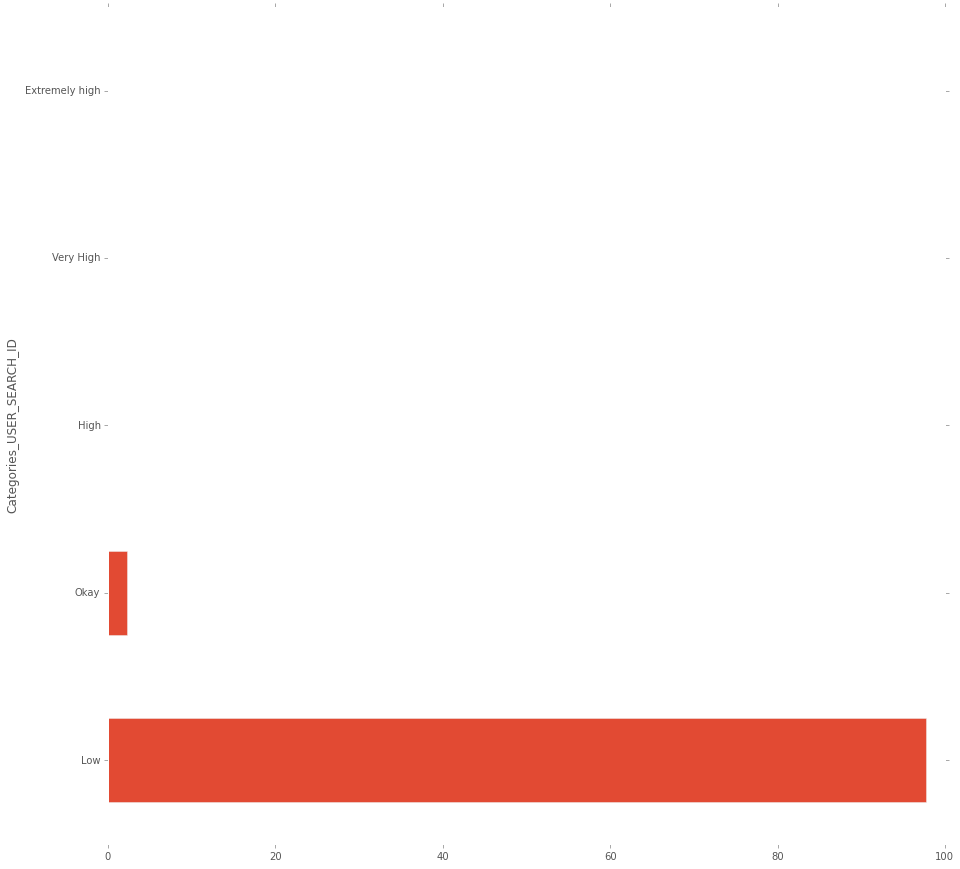

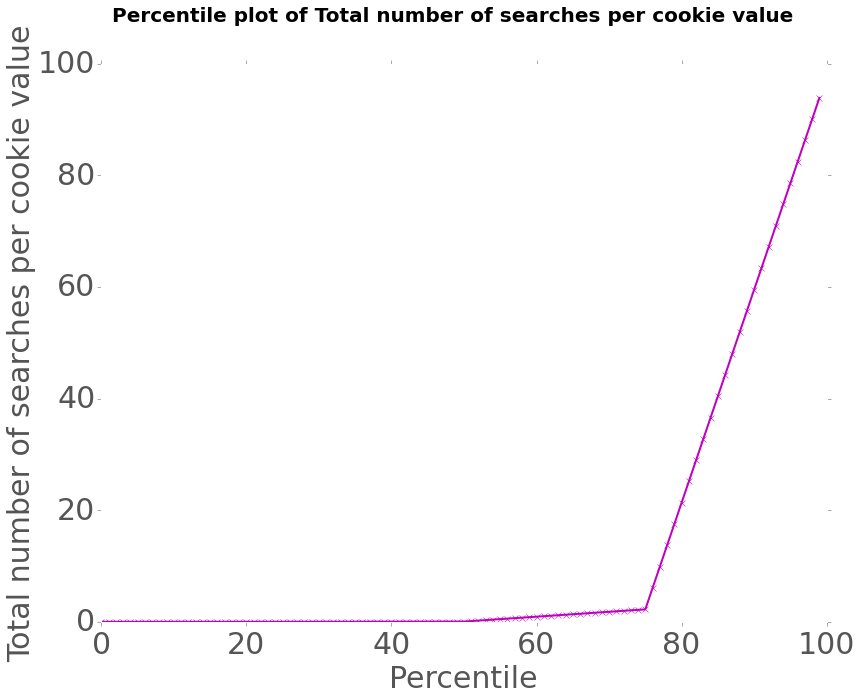

In [21]:
col_of_groupby='COOKIE_VALUE'
col_of_interest='USER_SEARCH_ID'
new_col_name='Categories_'+ col_of_interest

bins = [0, 5, 20, 30,40,50]
group_names = ['Low', 'Okay','High','Very High', 'Extremely high']

color_list=['r', 'g', 'b', 'c','y'] 
label_list=['L', 'O', 'H', 'VH','EH']

percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_g_cook_val= df_search_data.groupby([col_of_groupby]).count()
df_g_cook_val_2=df_g_cook_val[col_of_interest]
print df_g_cook_val_2.describe()
print df_g_cook_val_2.unique()

df_g_cook_val[new_col_name]= pd.cut(df_g_cook_val[col_of_interest], bins, labels=group_names)
df_cat_group = df_g_cook_val.groupby([new_col_name]).count()

sum_all= df_cat_group[col_of_interest].sum()

df_cat_group[col_of_interest]=df_cat_group[col_of_interest]*(100/float(sum_all))

print df_cat_group[col_of_interest]

df_cat_group[col_of_interest].plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()


perc_df_cat_group=df_cat_group.quantile(percentiles)

percentiles=[item*float(100) for item in percentiles]


figtitle='Percentile plot of Total number of searches per cookie value'
   
fig = plt.figure(figsize=(13,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of searches per cookie value',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
    tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
    tick.label.set_fontsize(30)   

ax.plot(percentiles,list(perc_df_cat_group[col_of_interest]),'-mx',linewidth=2)
    
plt.show()

#Segmenting search data wrt city of search

count    6489.000000
mean       32.622592
std       195.721345
min         1.000000
25%         1.000000
50%         4.000000
75%        13.000000
max      6335.000000
Name: USER_SEARCH_ID, dtype: float64
[  47    1   10   23    2   22    3    5    9   16   24    4  286   35   12
   19   13    8    6  146   87    7  283   91   92   48   34   38   20   14
  111   25  108   18   15   53   31   83   45  464   40  103   44   26  125
  186  120   21   37   27  877   93   55  443  629  116  113  500   84   70
   30 1284   17   73   79   29   85  132  114  460  303   49  123   67  153
  139   63  148   42  410   97  338  184   28   81   39   11   78  228   33
  147   88   46   61   71  178   59  130   69  104  205   41  300   66  128
  282   64  161   89  251   52  278   72  442   36   82  580 2793   43  233
  100   32  173   54 1450  328  684  427  226  315  166  115  221   99  347
 1591  269  239   51  694  154  165   86  407  185  145  144 4663 2954  496
  675  118   74  105  142 1628  904

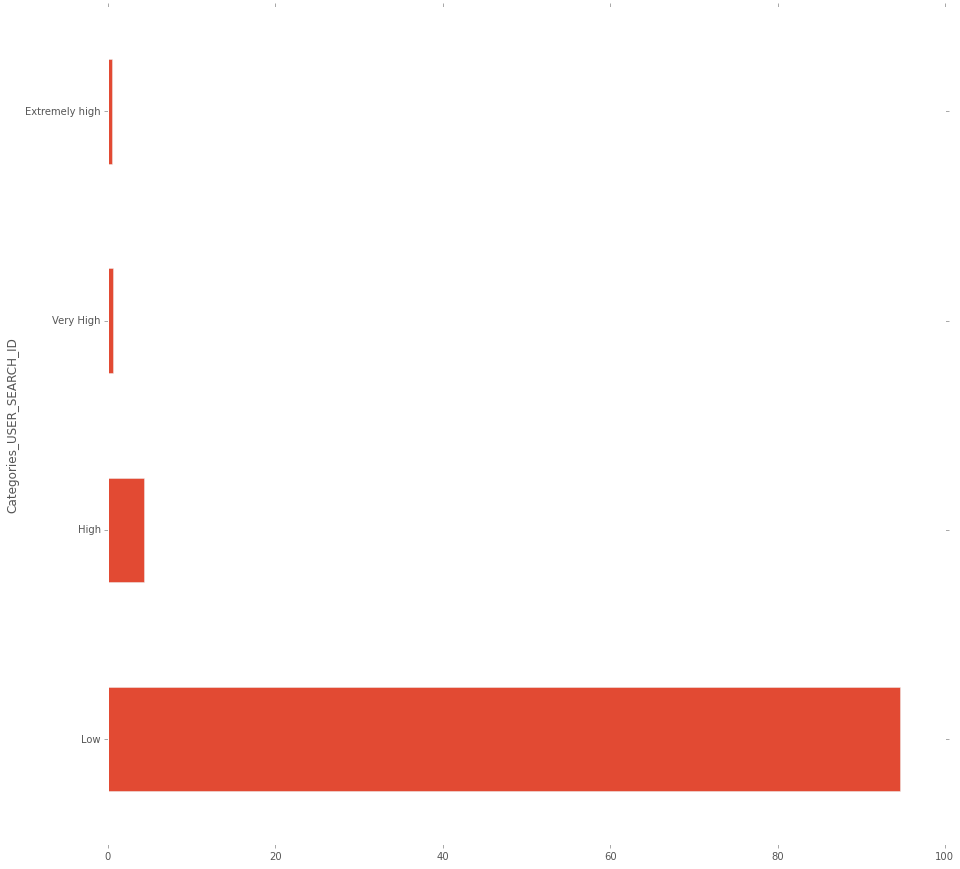

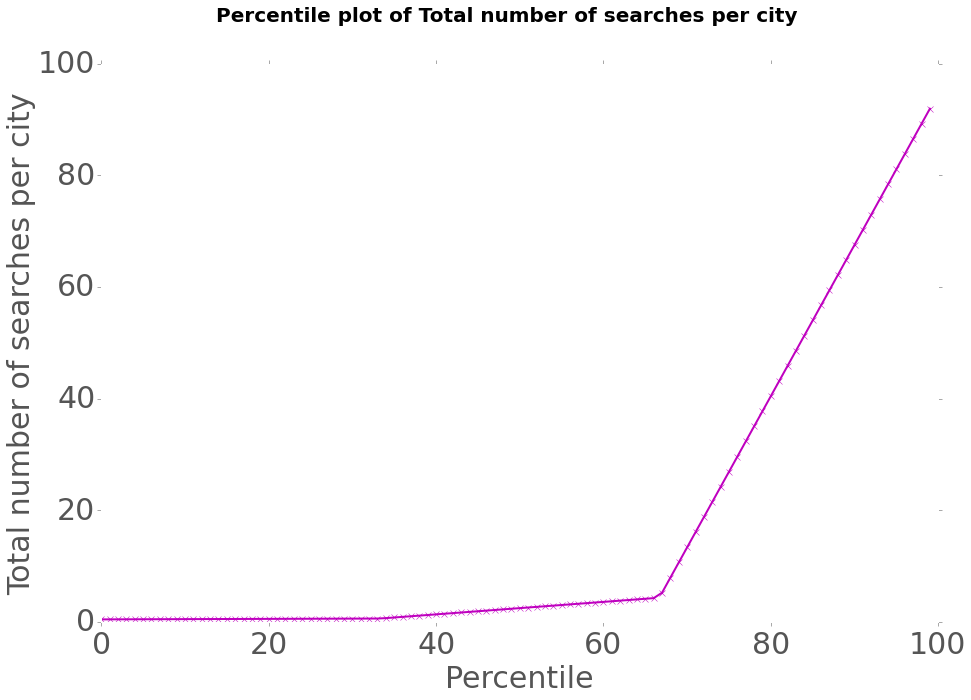

In [20]:
col_of_groupby='DEST_CITY_ID'
col_of_interest='USER_SEARCH_ID'
new_col_name='Categories_'+ col_of_interest
bins = [0, 100, 500, 1000,7000]
group_names = ['Low' ,'High','Very High', 'Extremely high']
color_list=['r', 'g', 'b', 'c']
label_list=['L', 'H', 'VH','EH']
percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_g_cook_dest_val= df_search_data.groupby([col_of_groupby]).count()
df_g_cook_dest_val2=df_g_cook_dest_val[col_of_interest].copy()
print df_g_cook_dest_val2.describe()
print df_g_cook_dest_val2.unique()

df_g_cook_dest_val[new_col_name]= pd.cut(df_g_cook_dest_val[col_of_interest], bins, labels=group_names)
df_cat_dest_group = df_g_cook_dest_val.groupby([new_col_name]).count()


sum_all= df_cat_dest_group[col_of_interest].sum()

df_cat_dest_group[col_of_interest]=df_cat_dest_group[col_of_interest]*(100/float(sum_all))


print df_cat_dest_group[col_of_interest]

df_cat_dest_group[col_of_interest].plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()

perc_df_cat_dest_group=df_cat_dest_group.quantile(percentiles)
percentiles=[item*float(100) for item in percentiles]


figtitle='Percentile plot of Total number of searches per city'
   
fig = plt.figure(figsize=(15,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of searches per city',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
    tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
    tick.label.set_fontsize(30)   

ax.plot(percentiles,list(perc_df_cat_dest_group[col_of_interest]),'-mx',linewidth=2)
    
plt.show()



#Segmenting search data wrt 'SRCH LOS' length of stay

count        22.000000
mean       9622.181818
std       35127.004375
min           1.000000
25%          17.000000
50%          65.500000
75%         896.500000
max      162758.000000
Name: USER_SEARCH_ID, dtype: float64
[162758  37752   5115   1975    936    778   1342    343    103     46
     35     16     44    256     48     10      3     14     20     83
      1]
SRCH_LOS
1           76.885794
2           17.833793
3            2.416292
4            0.932977
5            0.442160
6            0.367522
7            0.633952
8            0.162031
9            0.048657
10           0.021730
11           0.016534
12           0.007558
13           0.020785
14           0.120933
15           0.022675
16           0.004724
17           0.004724
18           0.001417
19           0.006614
20           0.009448
21           0.039209
71           0.000472
Name: USER_SEARCH_ID, dtype: float64


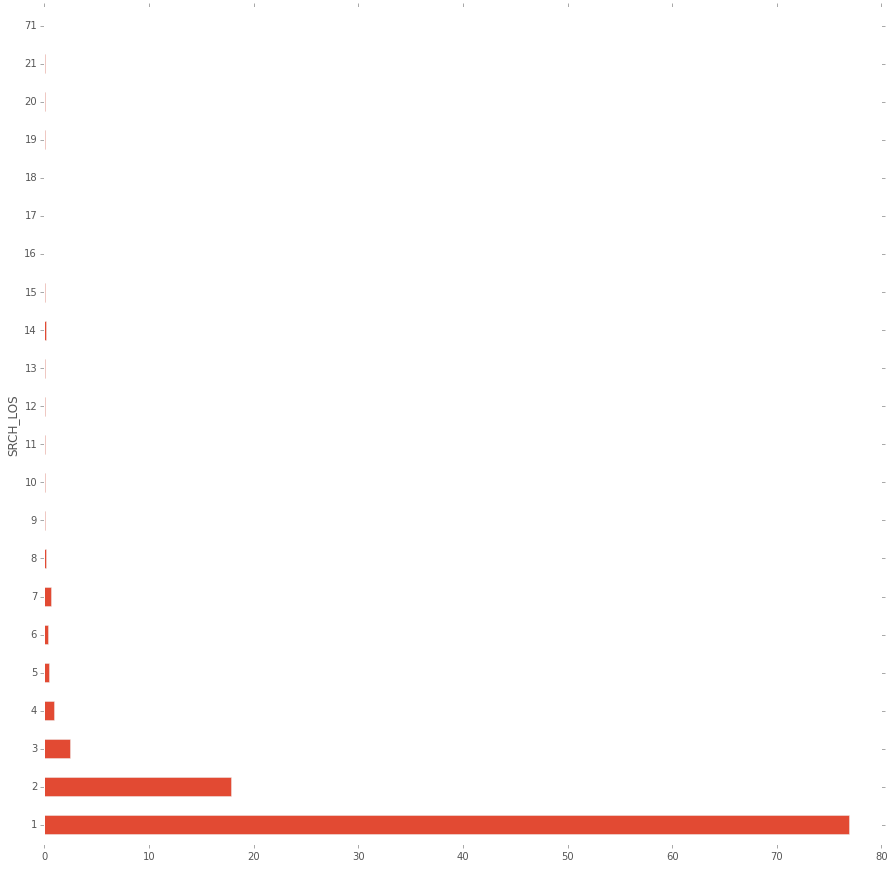

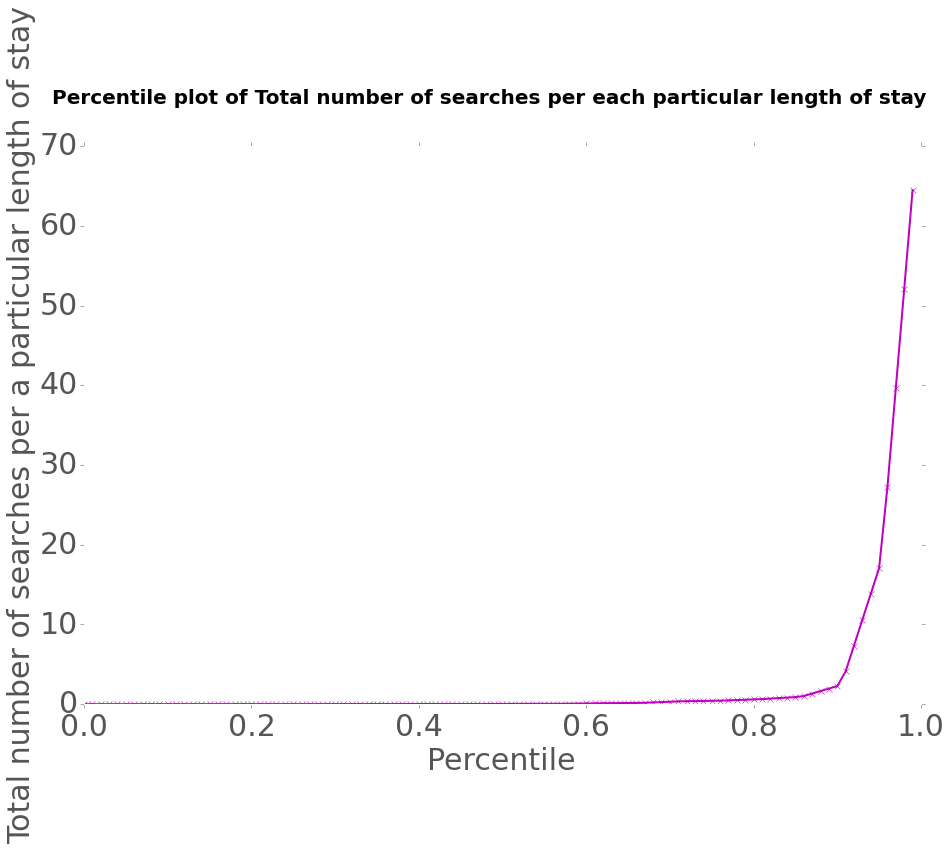

In [24]:
col_of_groupby='SRCH_LOS'
col_of_interest='USER_SEARCH_ID'
new_col_name='Categories_'+ col_of_interest
bins = [0, 500, 1000, 25000,162758]
group_names = ['Low' ,'High','Very High', 'Extremely high']
color_list=['r', 'g', 'b', 'c']
label_list=['L', 'H', 'VH','EH']
percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_g_cook_srchlos_val= df_search_data.groupby([col_of_groupby]).count()
df_g_cook_srchlos_val2=df_g_cook_srchlos_val[col_of_interest].copy()
print df_g_cook_srchlos_val2.describe()
print df_g_cook_srchlos_val2.unique()

sum_all= df_g_cook_srchlos_val2.sum()

df_g_cook_srchlos_val2=df_g_cook_srchlos_val2*(100/float(sum_all))

print df_g_cook_srchlos_val2

df_g_cook_srchlos_val2.plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()


perc_df_cat_srchlos_group=df_g_cook_srchlos_val2.quantile(percentiles)



figtitle='Percentile plot of Total number of searches per each particular length of stay'
   
fig = plt.figure(figsize=(15,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of searches per a particular length of stay',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
    tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
    tick.label.set_fontsize(30)   

ax.plot(percentiles,list(perc_df_cat_srchlos_group),'-mx',linewidth=2)
    
plt.show()


#Segmenting search data via 'SRCH AP' /advanced purchase window

count       13.000000
mean     16283.692308
std      10793.721203
min       4377.000000
25%       8784.000000
50%      10546.000000
75%      21997.000000
max      42038.000000
Name: USER_SEARCH_ID, dtype: float64
[42038 29936 24707 21997 18887 13135  8352 10063 10352 10546  8514  8784
  4377]
SRCH_AP
1          19.858471
2          14.141567
3          11.671422
4          10.391236
5           8.922093
6           6.204886
7           3.945429
8           4.753694
9           4.890216
10          4.981860
11          4.021957
12          4.149503
13          2.067666
Name: USER_SEARCH_ID, dtype: float64


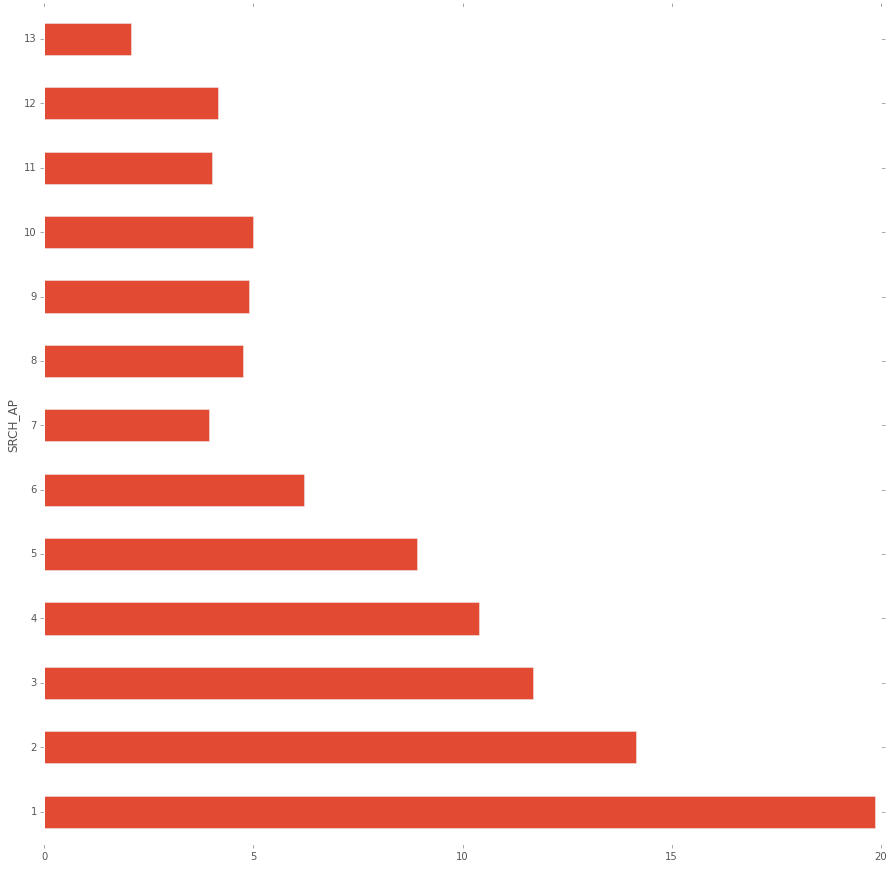

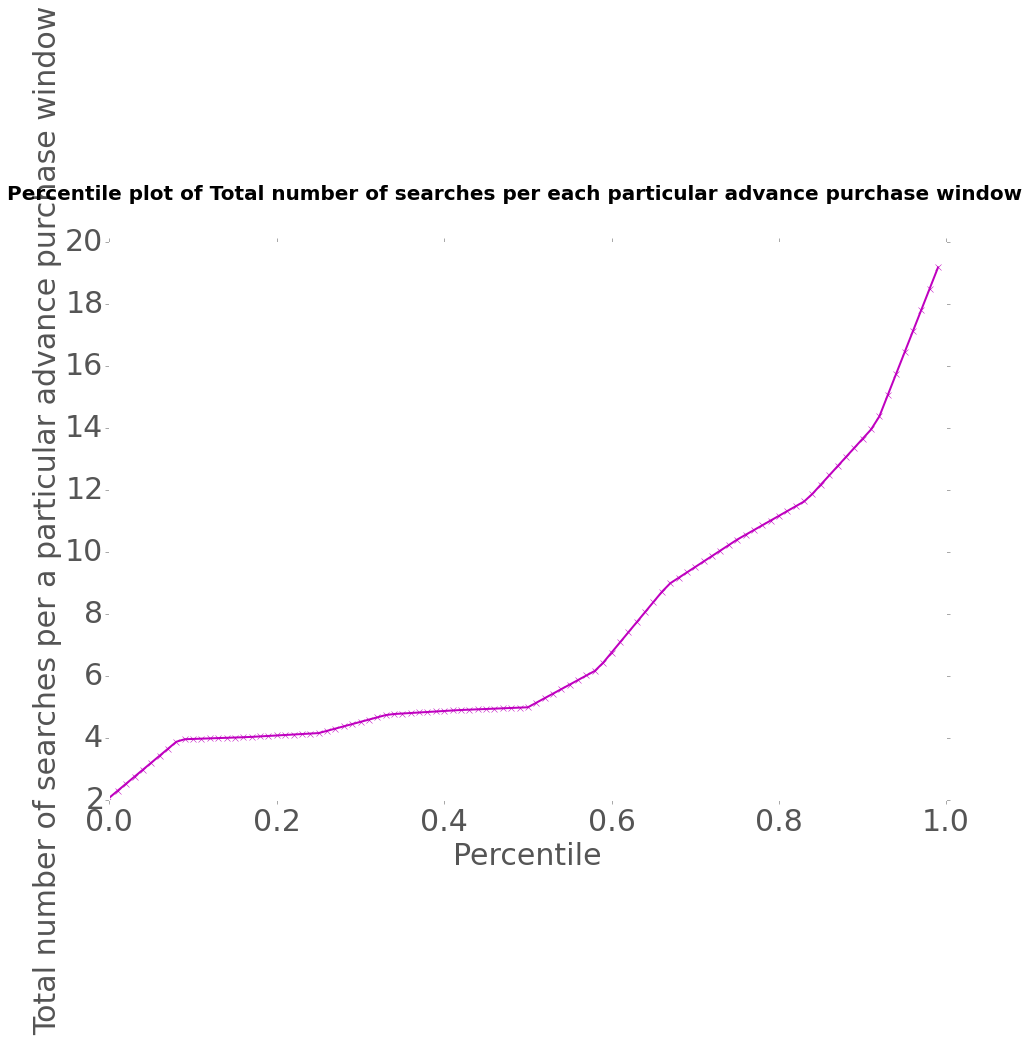

In [25]:
col_of_groupby='SRCH_AP'
col_of_interest='USER_SEARCH_ID'
new_col_name='Categories_'+ col_of_interest
bins = [0, 500, 1000, 25000,162758]
group_names = ['Low' ,'High','Very High', 'Extremely high']
color_list=['r', 'g', 'b', 'c']
label_list=['L', 'H', 'VH','EH']
percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_g_cook_srchap_val= df_search_data.groupby([col_of_groupby]).count()
df_g_cook_srchap_val2=df_g_cook_srchap_val[col_of_interest].copy()
print df_g_cook_srchap_val2.describe()
print df_g_cook_srchap_val2.unique()

sum_all= df_g_cook_srchap_val2.sum()

df_g_cook_srchap_val2=df_g_cook_srchap_val2*(100/float(sum_all))

print df_g_cook_srchap_val2

df_g_cook_srchap_val2.plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()


perc_df_cat_srchap_group=df_g_cook_srchap_val2.quantile(percentiles)



figtitle='Percentile plot of Total number of searches per each particular advance purchase window'
   
fig = plt.figure(figsize=(15,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of searches per a particular advance purchase window',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
    tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
    tick.label.set_fontsize(30)   

ax.plot(percentiles,list(perc_df_cat_srchap_group),'-mx',linewidth=2)
    
plt.show()


#Segmenting bookings via 'city of search'

count    3137.000000
mean       10.138349
std        31.365582
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       625.000000
Name: TRANSACTION_ID, dtype: float64
[ 26   8   1   2   9   3  91   5   4   6   7  19  28  33  12  11  18  40
  10  17  95  21  15  44  35  59 158  14  71  49 104  23 111  41  73  69
  25  16  13  27  42  79  31  34 325  38  29  60  53  96  32  20  24  98
  72 428 357  65  37  36  47  67 240  22  66  39 243  52 170 157  62 606
  30  56 148 395  45  75  46  77 625  48  80 324 180  43 129  68 175 215
 177 152 220 165 100 151  58  99 590  63 305 108 193  61 126 130 254 153
 101  83 114 196 116 147 125 244  97 138  74]
Categories_TRANSACTION_ID
Low                          86.356391
High                         11.635320
Very High                     1.051960
Extremely high                0.956328
Name: TRANSACTION_ID, dtype: float64


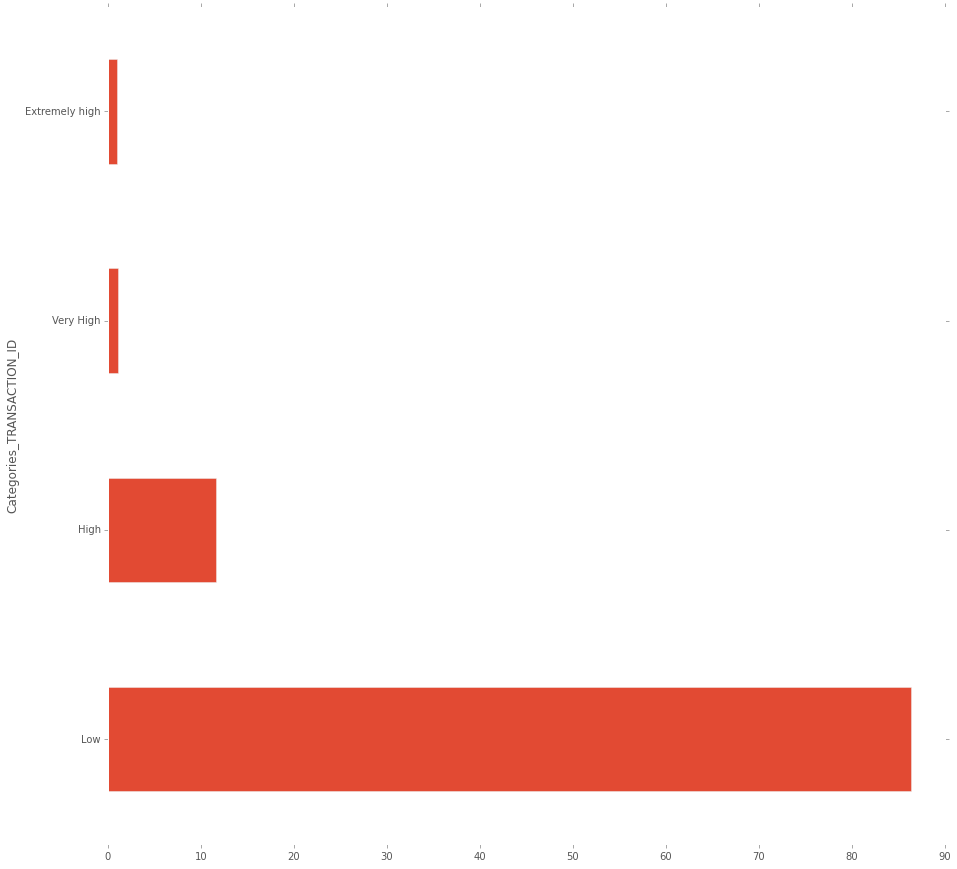

Categories_TRANSACTION_ID
Low                          86.356391
High                         11.635320
Very High                     1.051960
Extremely high                0.956328
Name: TRANSACTION_ID, dtype: float64


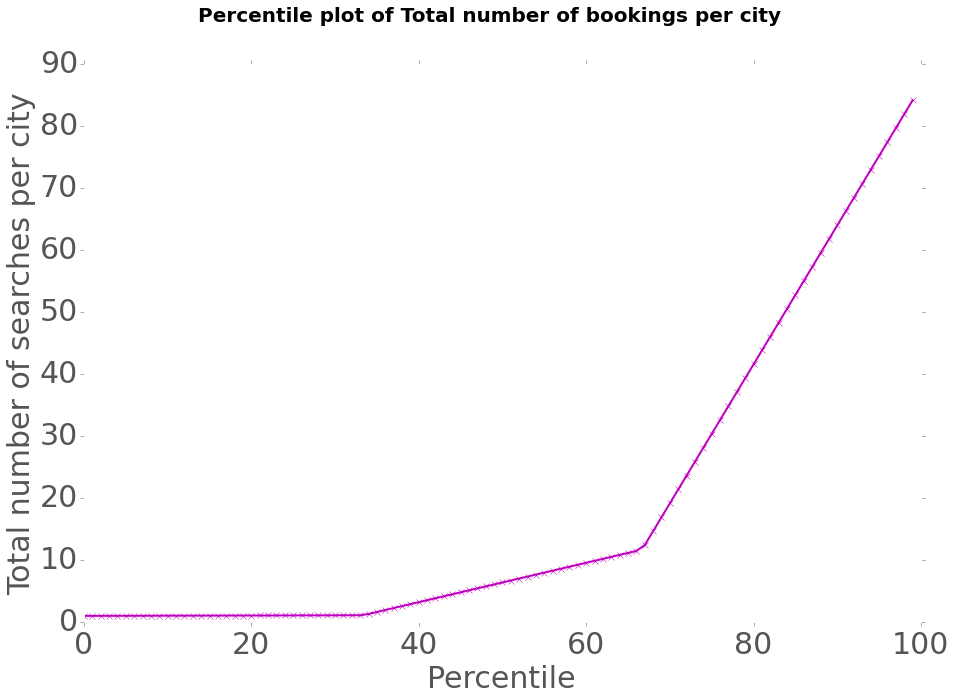

In [29]:
col_of_groupby='DEST_CITY_ID'
col_of_interest='TRANSACTION_ID'
df_b_dest_val= df_booking_data.groupby([col_of_groupby]).count()

new_col_name='Categories_'+ col_of_interest
bins = [0, 100, 500, 1000,7000]

bins=[item/float(7) for item in bins]


group_names = ['Low' ,'High','Very High', 'Extremely high']
color_list=['r', 'g', 'b', 'c']
label_list=['L', 'H', 'VH','EH']
percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_b_dest_val2=df_b_dest_val[col_of_interest].copy()
print df_b_dest_val2.describe()
print df_b_dest_val2.unique()

df_b_dest_val[new_col_name] = pd.cut(df_b_dest_val[col_of_interest], bins, labels=group_names)
df_b_cat_dest_group = df_b_dest_val.groupby([new_col_name]).count()


sum_all= df_b_cat_dest_group[col_of_interest].sum()

df_b_cat_dest_group[col_of_interest]=df_b_cat_dest_group[col_of_interest]*(100/float(sum_all))

print df_b_cat_dest_group[col_of_interest]

df_b_cat_dest_group[col_of_interest].plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()

perc_df_cat_dest_group=df_b_cat_dest_group.quantile(percentiles)
percentiles=[item*float(100) for item in percentiles]

print df_b_cat_dest_group[col_of_interest]

figtitle='Percentile plot of Total number of bookings per city'
   
fig = plt.figure(figsize=(15,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of searches per city',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
     tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
    tick.label.set_fontsize(30)   

ax.plot(percentiles,list(perc_df_cat_dest_group[col_of_interest]),'-mx',linewidth=2)
    
plt.show()

#Segmenting bookings via length of stay

count       16.000000
mean      1987.750000
std       6351.196701
min          1.000000
25%          2.750000
50%         12.500000
75%        131.250000
max      25270.000000
Name: TRANSACTION_ID, dtype: float64
[25270  5408   628   228    71    54    99    14     4     3     2     1
    11     7]
BK_LOS
1         79.455414
2         17.004150
3          1.974594
4          0.716891
5          0.223242
6          0.169790
7          0.311282
8          0.044020
9          0.012577
10         0.009433
11         0.006289
12         0.003144
13         0.006289
14         0.034587
15         0.006289
21         0.022010
Name: TRANSACTION_ID, dtype: float64


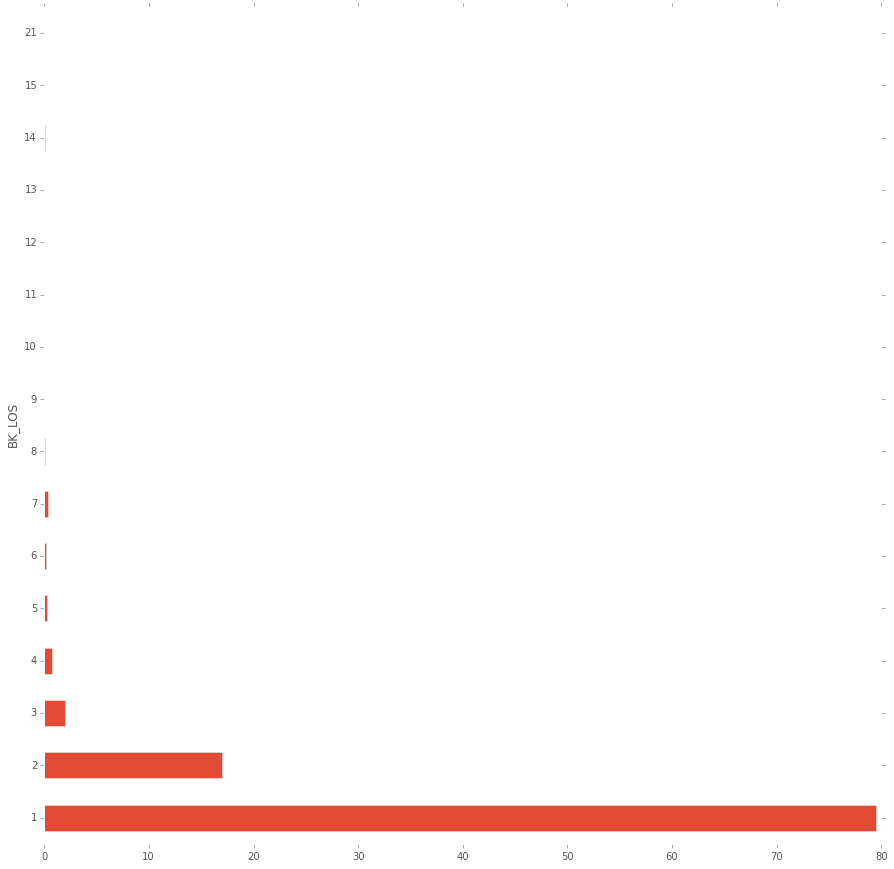

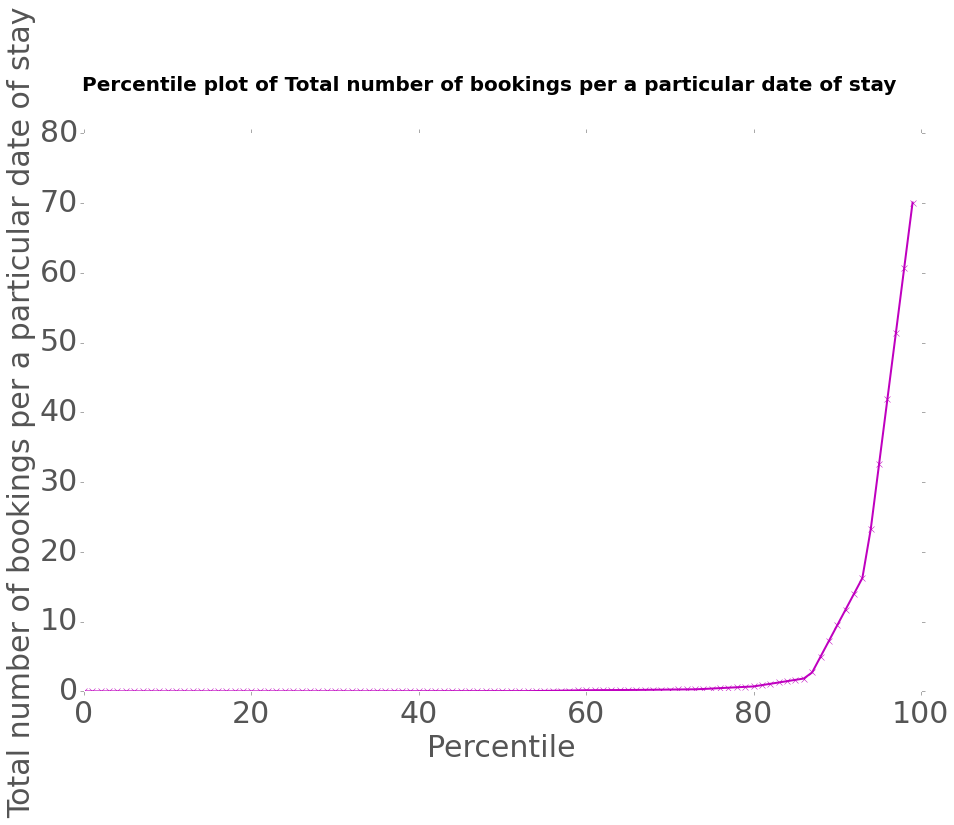

In [27]:
col_of_groupby='BK_LOS'
col_of_interest='TRANSACTION_ID'
df_b_los_val= df_booking_data.groupby([col_of_groupby]).count()

new_col_name='Categories_'+ col_of_interest
bins = [0, 5, 50, 100, 625]
group_names = ['Low' ,'High','Very High', 'Extremely high']
color_list=['r', 'g', 'b', 'c']
label_list=['L', 'H', 'VH','EH']
percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_b_los_val2=df_b_los_val[col_of_interest].copy()
print df_b_los_val2.describe()
print df_b_los_val2.unique()

sum_all= df_b_los_val2.sum()

df_b_los_val2=df_b_los_val2*(100/float(sum_all))

print df_b_los_val2

df_b_los_val2.plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()

perc_df_cat_los_group=df_b_los_val2.quantile(percentiles)
percentiles=[item*float(100) for item in percentiles]


figtitle='Percentile plot of Total number of bookings per a particular date of stay'
   
fig = plt.figure(figsize=(15,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of bookings per a particular date of stay',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
     tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
     tick.label.set_fontsize(30)   
ax.plot(percentiles,list(perc_df_cat_los_group),'-mx',linewidth=2)
    
plt.show()

#Segmenting bookings via advanced purchase window'

count      13.000000
mean     2446.461538
std      2000.730559
min       614.000000
25%      1205.000000
50%      1365.000000
75%      3233.000000
max      7651.000000
Name: TRANSACTION_ID, dtype: float64
[7651 4682 3833 3233 2721 1970 1365 1331 1296 1205  965  938  614]
BK_AP
1        24.056722
2        14.721419
3        12.051943
4        10.165388
5         8.555528
6         6.194189
7         4.291913
8         4.185008
9         4.074959
10        3.788832
11        3.034210
12        2.949315
13        1.930575
Name: TRANSACTION_ID, dtype: float64


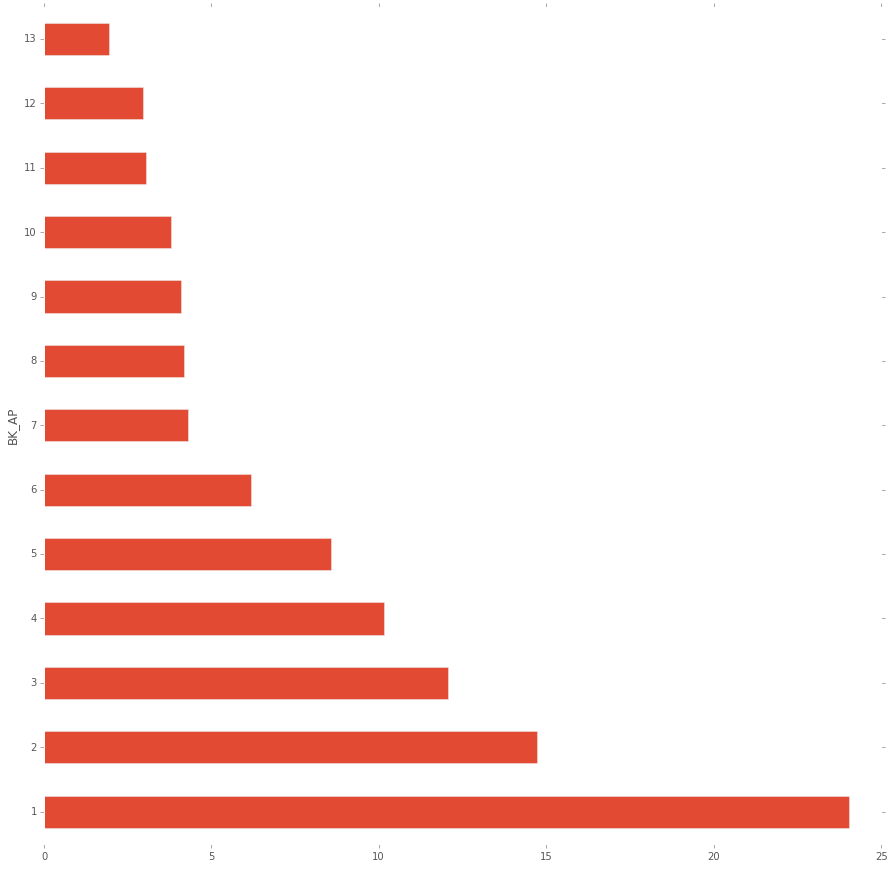

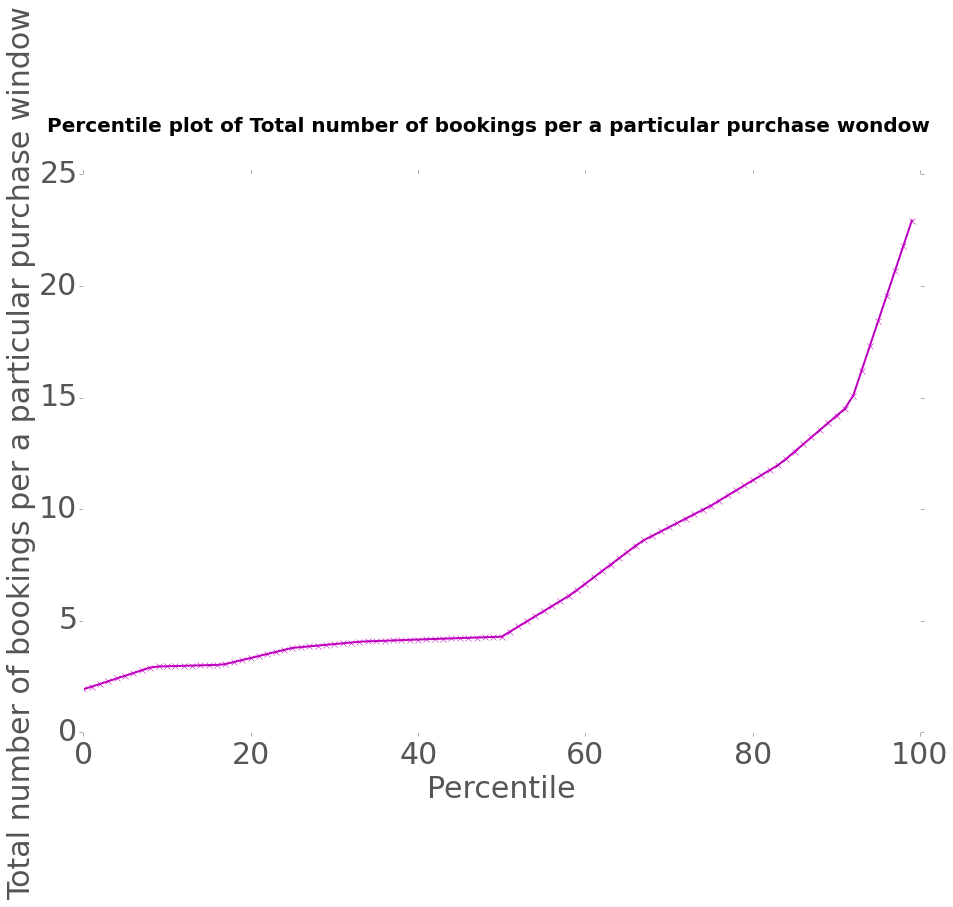

In [28]:
col_of_groupby='BK_AP'
col_of_interest='TRANSACTION_ID'
df_b_ap_val= df_booking_data.groupby([col_of_groupby]).count()

new_col_name='Categories_'+ col_of_interest
bins = [0, 5, 50, 100, 625]
group_names = ['Low' ,'High','Very High', 'Extremely high']
color_list=['r', 'g', 'b', 'c']
label_list=['L', 'H', 'VH','EH']
percentiles=range(100)
percentiles=[item/float(100) for item in percentiles]

df_b_ap_val2=df_b_ap_val[col_of_interest].copy()
print df_b_ap_val2.describe()
print df_b_ap_val2.unique()

sum_all= df_b_ap_val2.sum()

df_b_ap_val2=df_b_ap_val2*(100/float(sum_all))

print df_b_ap_val2

df_b_ap_val2.plot(x=col_of_interest, kind='barh',figsize=(15,15))

plt.show()

perc_df_cat_ap_group=df_b_ap_val2.quantile(percentiles)
percentiles=[item*float(100) for item in percentiles]


figtitle='Percentile plot of Total number of bookings per a particular purchase wondow'
   
fig = plt.figure(figsize=(15,10))
fig.suptitle(figtitle, fontsize=20, fontweight='bold')
ax = fig.add_subplot(111)


ax.set_xlabel('Percentile',fontsize=30)
ax.set_ylabel('Total number of bookings per a particular purchase window',fontsize=30)
for tick in ax.xaxis.get_major_ticks(): 
     tick.label.set_fontsize(30) 
for tick in ax.yaxis.get_major_ticks(): 
     tick.label.set_fontsize(30)   
ax.plot(percentiles,list(perc_df_cat_ap_group),'-mx',linewidth=2)
    
plt.show()

#Recommendations

1. All the users who search more than 5 times in the given time should be offered coupons to increase conversion rate, as less than 2.3 % do it.

2. Target segments of people whose percentage search rate is higher than percentage booking rate.

For example When I segment data with respect to the destination of search, I would suggest offering coupons to those 
segments that that have greater search percentage than booking percentage.

Similar approach to be followed when we segment data with respect to length of stay and purchase window.
